In [1]:
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from classical_solvers.solver_benchmark import SolverBenchmark

In [2]:
def run_benchmark(solver):
    benchmark_results = []
    with tqdm(total=len(solver.nx_list), desc=f"Running {solver.name} Benchmark") as pbar:

        if solver.traversal_method == 'nested':
            for nx in solver.nx_list:
                for ny in solver.ny_list:
                    pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                    solver.run(nx, ny)
                    pbar.update(1)
        elif solver.traversal_method == 'zip':
            for nx, ny in zip(solver.nx_list, solver.ny_list):
                pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                solver.run(nx, ny)
                pbar.update(1)
    return benchmark_results

Solver: brute_force, Size: nx=3, ny=1:  40%|████      | 2/5 [00:00<00:00, 141.45it/s]

Solver: simulated_annealing, Size: nx=5, ny=5: 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]
/Users/azhutov/.virtualenvs/cspraa/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/azhutov/.virtualenvs/cspraa/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


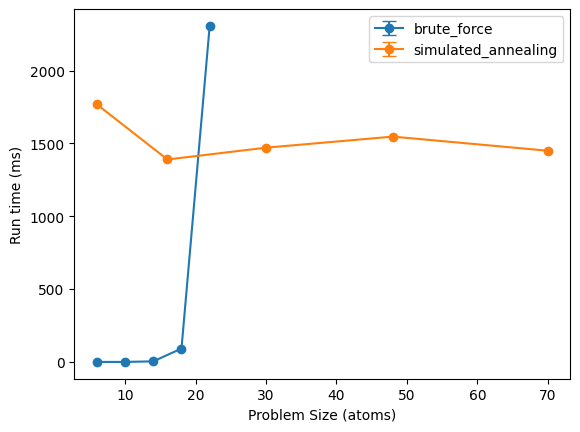

In [6]:
if not os.path.exists("./solutions"):
    os.makedirs("./solutions")

brute_force_config = {
    "name": "brute_force",
    "executable": "./brute_force/brute_force",
    "nx_list": [1, 2, 3, 4, 5],
    "ny_list": [1, 1, 1, 1, 1],
    "crystals_directory": '../native_crystal_database/benchmark_crystals/brute_force/',
    "traversal_method": 'zip'
}

simulated_annealing_config = {
    "name": "simulated_annealing",
    "executable": "./simulated_annealing/simulated_annealing",
    "nx_list": [1, 2, 3, 4, 5],
    "ny_list": [1, 2, 3, 4, 5],
    "crystals_directory": '../native_crystal_database/benchmark_crystals/simulated_annealing/',
    "repetitions": 100,
    "iterations": 1e4,
    "traversal_method": 'zip'
}

brute_force_solver = SolverBenchmark(**brute_force_config)
simulated_annealing_solver = SolverBenchmark(**simulated_annealing_config)

brute_force_solver.generate_problems()
simulated_annealing_solver.generate_problems()

# Run benchmark for each solver
for solver in [brute_force_solver, simulated_annealing_solver]:
    run_benchmark(solver)

# Load benchmark results
df = pd.read_csv('./benchmark_results.csv')
stats_df = df.groupby(['solver', 'problem_size'])['runtime'].agg(['mean', 'std']).reset_index()
fig, ax = plt.subplots()
for solver in stats_df['solver'].unique():
    solver_df = stats_df[stats_df['solver'] == solver]
    ax.errorbar(solver_df['problem_size'], solver_df['mean'], yerr=solver_df['std'], label=solver, fmt='-o', capsize=5)

ax.set_xlabel('Problem Size (atoms)')
ax.set_ylabel('Run time (ms)')
ax.legend()
plt.show()